<a href="https://colab.research.google.com/github/TheQuestionMark4242/EyetrackingExperiment/blob/main/EyetrackingExperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import astropy as ap
from google.colab import files
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/merged.csv")
df

,CellRank,FixationType,ImageID,ParticipantID,X,Y,ID,R,G,B,Hue,Saturation,Value,DomHue,DomSat,DomVal
0,1,first,1,1,2,1,1,162,126,152,316.666667,0.222222,0.635294,294,0.958333,0.8448
1,2,first,1,1,5,2,1,35,92,122,200.689655,0.713115,0.478431,294,0.958333,0.8448
2,3,first,1,1,5,3,1,135,129,165,250.000000,0.218182,0.647059,294,0.958333,0.8448
3,1,largest,1,1,1,4,1,74,84,60,85.000000,0.285714,0.329412,294,0.958333,0.8448
4,2,largest,1,1,0,3,1,119,143,181,216.774194,0.342541,0.709804,294,0.958333,0.8448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,1,largest,38,9,2,0,38,179,0,0,0.000000,1.000000,0.701961,360,1.000000,0.0600
1782,2,largest,38,9,2,0,38,179,0,0,0.000000,1.000000,0.701961,360,1.000000,0.0600
1783,2,first,38,9,1,0,38,179,0,0,0.000000,1.000000,0.701961,360,1.000000,0.0600
1784,3,first,38,9,1,0,38,179,0,0,0.000000,1.000000,0.701961,360,1.000000,0.0600


Partitioning the data into two datasets for the polychromatic experiment (images 1 through 20) and the bichromatic experiment (images 21 through 38), respectively.
 

In [ ]:
pc, bc = [x for _, x in df.groupby(df['ImageID'] > 20) ]


---
# Polychromatic Experiment:

In [ ]:
pc

,CellRank,FixationType,ImageID,ParticipantID,X,Y,ID,R,G,B,Hue,Saturation,Value,DomHue,DomSat,DomVal
0,1,first,1,1,2,1,1,162,126,152,316.666667,0.222222,0.635294,294,0.958333,0.8448
1,2,first,1,1,5,2,1,35,92,122,200.689655,0.713115,0.478431,294,0.958333,0.8448
2,3,first,1,1,5,3,1,135,129,165,250.000000,0.218182,0.647059,294,0.958333,0.8448
3,1,largest,1,1,1,4,1,74,84,60,85.000000,0.285714,0.329412,294,0.958333,0.8448
4,2,largest,1,1,0,3,1,119,143,181,216.774194,0.342541,0.709804,294,0.958333,0.8448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,1,largest,20,8,3,0,20,140,107,74,30.000000,0.471429,0.549020,288,0.900000,1.0000
942,2,first,20,8,1,0,20,69,85,134,225.230769,0.485075,0.525490,288,0.900000,1.0000
943,3,largest,20,8,1,0,20,69,85,134,225.230769,0.485075,0.525490,288,0.900000,1.0000
944,3,first,20,8,1,3,20,100,105,124,227.500000,0.193548,0.486275,288,0.900000,1.0000


In [ ]:
pc_first_fp, pc_largest_fp = [x for _, x in pc.groupby('FixationType')]

In [ ]:
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import astropy
sns.set_theme(color_codes=True)

In [ ]:
def linear_correlate(df, first_name, second_name):
  sns.regplot(x = first_name, y = second_name, data = df)
  print("Pearson Correlation Coefficient between {} and {} is {} with a p-value of {}".format(
      first_name, 
      second_name,
      pearsonr(df[first_name], df[second_name])[0], 
      pearsonr(df[first_name], df[second_name])[1])
  )

def circular_correlate(df, first_name, second_name):
  from astropy.stats import circcorrcoef, circmean
  from astropy import units as u
  first = np.pi*df[first_name]/180
  second = np.pi*df[second_name]/180
  r = circcorrcoef(first, second)
  first_mean = circmean(df[first_name])
  second_mean = circmean(df[second_name])
  x = zip(
      np.sin(np.subtract(first,first_mean)), 
      np.sin(np.subtract(second,second_mean))
  )
  s11 = 0
  s22 = 0
  for a,b in x:
    s11 = s11 + a*b
    s22 = s22 + a*a*b*b
  z = s11/s22
  import scipy.stats
  p = scipy.stats.t.sf(abs(z), df= df.size)*2

  print("The circular correlation between {} and {} is {} with p-value {}.".format(
      first_name, 
      second_name, 
      r,
      p
    )
  )

We perform the following analysis:


1.   Inspect the correlation between the HSV attributes of the *first fixation point colour* and the *dominant colour*.
2.   Inspect the correlation between the HSV attributes of the *largest fixation point colour* and the *dominant colour*.
##First Fixation Point:




In [ ]:
pc_first_fp

,CellRank,FixationType,ImageID,ParticipantID,X,Y,ID,R,G,B,Hue,Saturation,Value,DomHue,DomSat,DomVal
0,1,first,1,1,2,1,1,162,126,152,316.666667,0.222222,0.635294,294,0.958333,0.8448
1,2,first,1,1,5,2,1,35,92,122,200.689655,0.713115,0.478431,294,0.958333,0.8448
2,3,first,1,1,5,3,1,135,129,165,250.000000,0.218182,0.647059,294,0.958333,0.8448
6,1,first,1,5,5,2,1,35,92,122,200.689655,0.713115,0.478431,155,0.360656,0.5490
7,2,first,1,5,5,2,1,35,92,122,200.689655,0.713115,0.478431,155,0.360656,0.5490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2,first,20,6,1,1,20,79,79,115,240.000000,0.313043,0.450980,308,0.900000,1.0000
939,3,first,20,6,0,4,20,114,19,87,317.052632,0.833333,0.447059,308,0.900000,1.0000
940,1,first,20,8,3,0,20,140,107,74,30.000000,0.471429,0.549020,288,0.900000,1.0000
942,2,first,20,8,1,0,20,69,85,134,225.230769,0.485075,0.525490,288,0.900000,1.0000


We investigate first the correlation between the linear attributes of the HSV model, *saturation* and *value*.

Pearson Correlation Coefficient between Saturation and DomSat is -0.005981829812533286 with a p-value of 0.8967617385779394


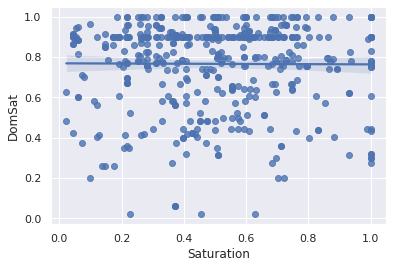

In [ ]:
linear_correlate(pc_first_fp, "Saturation", "DomSat")

Pearson Correlation Coefficient between Value and DomVal is 0.007283254575178357 with a p-value of 0.874469956372781


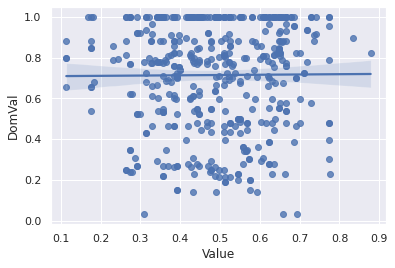

In [ ]:
linear_correlate(pc_first_fp, "Value", "DomVal")

For the circular measure, *hue* of the HSV model we use the Circular Correlation Measure as described by Jammalamadaka and SenGupta (2001).

In [ ]:
circular_correlate(pc_first_fp, "Hue", "DomHue")

The circular correlation between Hue and DomHue is 0.12615097670017 with p-value 0.8131342318145092.


##Largest Fixation Point

Pearson Correlation Coefficient between Saturation and DomSat is -0.010868392269354954 with a p-value of 0.8136239863501298


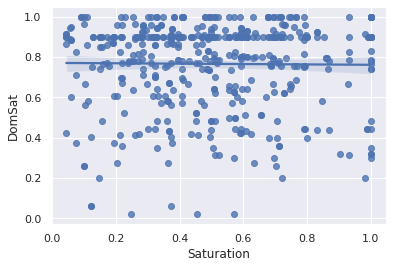

In [ ]:
linear_correlate(pc_largest_fp, "Saturation", "DomSat")

Pearson Correlation Coefficient between Value and DomVal is 0.03767189854308937 with a p-value of 0.4136815813946123


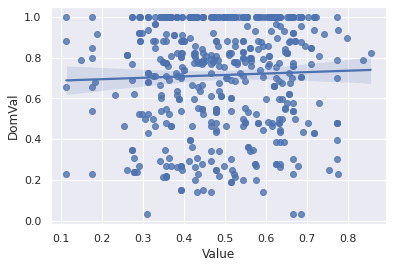

In [ ]:
linear_correlate(pc_largest_fp, "Value", "DomVal")

In [ ]:
circular_correlate(pc_largest_fp, "Hue", "DomHue")

The circular correlation between Hue and DomHue is 0.06621004394005049 with p-value 0.9893777078911581.


There appears to be no correlation whatsoever between the dominant colour chosen and the fixation colours chosen in any of their attributes.


##Distribution of Hues for Fixation Points and Dominant Colour:

In [ ]:
def polar_plot(df, col):
  import numpy as np
  import matplotlib.pyplot as plt
  import math
  N = 3
  column = df[col]

  theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
  radii = np.zeros(N)
  for x in column:
    radii[math.floor(x/(360/N))%N] = radii[math.floor(x/(360/N))%N] + 1
  width = 2 * np.pi / N
  colors = plt.cm.hsv(theta/2/np.pi)

  ax = plt.subplot(111, projection='polar')
  bars = ax.bar(theta, radii, width=width, bottom=4, color=colors)

  plt.show()

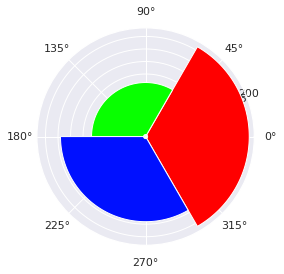

In [ ]:
polar_plot(pc_first_fp, "Hue")

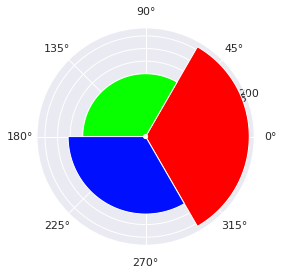

In [ ]:
polar_plot(pc_largest_fp, "Hue")


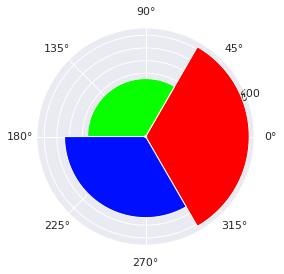

In [ ]:
polar_plot(pc, "Hue")

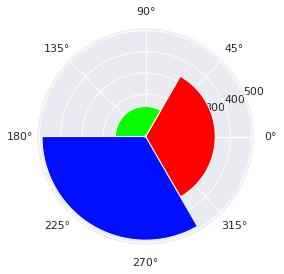

In [ ]:
polar_plot(pc, "DomHue")

Red hues are consistently seen as the modal colour for fixation points. Dominant hues have blue as a modal colour.

#Bichromatic Experiment:
##Concentration Hypothesis:
We test the hypothesis that the colour occuring in higher concentration on each image is fixated upon. The colours in each image are indexed 1 or 2 according to their order as follows R<G<B<Y. I.e in an image with R and B squares, we index red as colour 1 and B as colour 2.

The *stimulus type* can then be defined as whether the image has higher, equal or lower concentration of colour 1 than colour 2.

We use the $\chi^2$-test of independence between the categorical variables fixation colour and stimulus type.

Formally, we have:

1.   *Null Hypothesis*: The fixation colour and stimulus type are *independent*.
2.   *Alternative Hypothesis*: The fixation colour and stimulus type are *dependent*.

We perform the test for both the *first fixation colour* and *largest fixation colour*.


In [ ]:
bc

,CellRank,FixationType,ImageID,ParticipantID,X,Y,ID,R,G,B,Hue,Saturation,Value,DomHue,DomSat,DomVal
946,1,first,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
947,2,first,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
948,3,first,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
949,1,largest,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
950,2,largest,21,1,2,2,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,1,largest,38,9,2,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600
1782,2,largest,38,9,2,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600
1783,2,first,38,9,1,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600
1784,3,first,38,9,1,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600


In [ ]:
bc_first_fp, bc_largest_fp = [x for _, x in bc.groupby('FixationType')]
hue_to_index = dict(zip(bc.Hue.unique(), [4, 2, 1, 3]))
hue_to_index

{0.0: 1, 60.0: 4, 120.0: 2, 240.0: 3}

In [ ]:
image_char = [
              [0, 18, 0, 18],
              [18, 18, 0, 0],
              [20, 16, 0, 0],
              [20, 0, 16, 0],
              [0, 0, 16, 20],
              [0, 0, 20, 16],
              [20, 0, 0, 16],
              [0, 0, 18, 18],
              [16, 0, 20, 0],
              [16, 0, 0, 20],
              [16, 20, 0, 0],
              [0, 20, 0, 16],
              [18, 0, 18, 0],
              [0, 16, 20, 0],
              [0, 20, 16, 0],
              [0, 18, 18, 0],
              [0, 16, 0, 20],
              [18, 0, 18, 0]

]
image_char

[[0, 18, 0, 18],
 [18, 18, 0, 0],
 [20, 16, 0, 0],
 [20, 0, 16, 0],
 [0, 0, 16, 20],
 [0, 0, 20, 16],
 [20, 0, 0, 16],
 [0, 0, 18, 18],
 [16, 0, 20, 0],
 [16, 0, 0, 20],
 [16, 20, 0, 0],
 [0, 20, 0, 16],
 [18, 0, 18, 0],
 [0, 16, 20, 0],
 [0, 20, 16, 0],
 [0, 18, 18, 0],
 [0, 16, 0, 20],
 [18, 0, 18, 0]]

In [ ]:
image_details = []
for x, i in zip(image_char, range(18)):
  c = []
  for k in range(0, 4):
    if(x[k] != 0):
      c.append(k)
  image_details.append({"colors": c})
for i in range(0, 18):
  y = image_details[i]
  x = image_char[i]
  if(x[y['colors'][0]] > x[y['colors'][1]]):
    y["type"] = 1
  elif (x[y['colors'][0]] < x[y['colors'][1]]):
    y["type"] = 2
  else:
    y["type"] = 3
  
image_details

[{'colors': [1, 3], 'type': 3},
 {'colors': [0, 1], 'type': 3},
 {'colors': [0, 1], 'type': 1},
 {'colors': [0, 2], 'type': 1},
 {'colors': [2, 3], 'type': 2},
 {'colors': [2, 3], 'type': 1},
 {'colors': [0, 3], 'type': 1},
 {'colors': [2, 3], 'type': 3},
 {'colors': [0, 2], 'type': 2},
 {'colors': [0, 3], 'type': 2},
 {'colors': [0, 1], 'type': 2},
 {'colors': [1, 3], 'type': 1},
 {'colors': [0, 2], 'type': 3},
 {'colors': [1, 2], 'type': 2},
 {'colors': [1, 2], 'type': 1},
 {'colors': [1, 2], 'type': 3},
 {'colors': [1, 3], 'type': 2},
 {'colors': [0, 2], 'type': 3}]

In [ ]:
def chi2_test_hyp1(df, title):
  data = np.zeros((2,3))
  for fix_col, image_id in zip(df['Hue'], df['ImageID']):
    if((hue_to_index[fix_col]-1)!=image_details[image_id-21]['colors'][0]):
      color = 1
    else:
      color = 0 
    stim_type = image_details[image_id-21]['type']-1
    data[color][stim_type] = data[color][stim_type] + 1

  fig = plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
  plt.clf()
  ax = fig.add_subplot(111)
  ax.set_aspect(1)
  res = sns.heatmap(data, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)
  plt.title(title, fontsize=12)
  plt.xticks([i+0.5 for i in range(data.shape[1])], ['C1 > C2', 'C1 < C2','C1 = C2'])
  plt.xticks(rotation=0)
  plt.yticks([i+0.5 for i in range(data.shape[0])], ['Color 1', 'Color 2'])
  plt.yticks(rotation=0)
  plt.savefig("plot_contingency_table_seaborn_matplotlib_02.png", bbox_inches='tight', dpi=100)
  plt.show()
  from scipy.stats import chi2_contingency
  chi2, p, foo, bar = chi2_contingency(data)
  print("\nChi-squared test yields test statistic {} with p-value {}.".format(chi2, p))

In [ ]:
def chi2_test_hyp2(df, title):
  data = np.zeros((2,2))
  for fix_col, image_id, dom_hue in zip(df['Hue'], df['ImageID'], df['DomHue']):
    if((hue_to_index[fix_col]-1)!=image_details[image_id-21]['colors'][0]):
      color = 1
    else:
      color = 0 
    dom = np.argmin(np.abs(np.array([0.0, 120.0, 240.0, 60.0])-dom_hue))
    if(dom != image_details[image_id-21]['colors'][0]):
      dom_ind = 1
    else:
      dom_ind = 0
    data[color][dom_ind] += 1

  fig = plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
  plt.clf()
  ax = fig.add_subplot(111)
  ax.set_aspect(1)
  res = sns.heatmap(data, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)
  plt.title(title, fontsize=12)
  plt.xticks([i+0.5 for i in range(data.shape[1])], ['Non-dominant', 'Dominant'])
  plt.xticks(rotation=0)
  plt.yticks([i+0.5 for i in range(data.shape[0])], ['Color 1', 'Color 2'])
  plt.yticks(rotation=0)
  plt.savefig("plot_contingency_table_seaborn_matplotlib_02.png", bbox_inches='tight', dpi=100)
  plt.show()
  from scipy.stats import chi2_contingency
  chi2, p, foo, bar = chi2_contingency(data)
  print("\nChi-squared test yields test statistic {} with p-value {}.".format(chi2, p))

###First Fixation Point Analysis:




In [ ]:
bc_first_fp

,CellRank,FixationType,ImageID,ParticipantID,X,Y,ID,R,G,B,Hue,Saturation,Value,DomHue,DomSat,DomVal
946,1,first,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
947,2,first,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
948,3,first,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
952,2,first,21,3,2,0,21,128,128,0,60.0,1.0,0.501961,65,0.882682,0.5549
954,1,first,21,3,2,3,21,0,128,0,120.0,1.0,0.501961,65,0.882682,0.5549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,1,first,38,6,1,3,38,179,0,0,0.0,1.0,0.701961,0,0.900000,1.0000
1779,3,first,38,6,1,1,38,179,179,0,60.0,1.0,0.701961,0,0.900000,1.0000
1780,1,first,38,9,2,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600
1783,2,first,38,9,1,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600


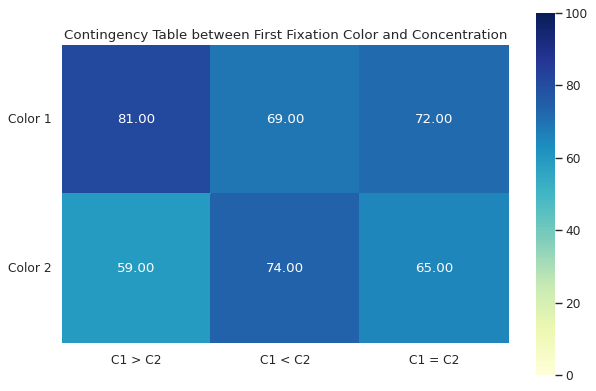


Chi-squared test yields test statistic 2.6267809379952722 with p-value 0.2689067889259321.


In [ ]:
chi2_test_hyp1(bc_first_fp, "Contingency Table between First Fixation Color and Concentration")

Based on the p-value we may accept the hypothesis presented at significance level 0.05.
Therefore, we conclude that the first fixation hue and the concentration of the color in the image are, indeed, independent.

##Largest Fixation Point


In [ ]:
bc_largest_fp

,CellRank,FixationType,ImageID,ParticipantID,X,Y,ID,R,G,B,Hue,Saturation,Value,DomHue,DomSat,DomVal
949,1,largest,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
950,2,largest,21,1,2,2,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
951,3,largest,21,1,1,2,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
953,3,largest,21,3,2,0,21,128,128,0,60.0,1.0,0.501961,65,0.882682,0.5549
955,2,largest,21,3,2,3,21,0,128,0,120.0,1.0,0.501961,65,0.882682,0.5549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,2,largest,38,6,1,0,38,179,0,0,0.0,1.0,0.701961,0,0.900000,1.0000
1778,3,largest,38,6,1,3,38,179,0,0,0.0,1.0,0.701961,0,0.900000,1.0000
1781,1,largest,38,9,2,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600
1782,2,largest,38,9,2,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600


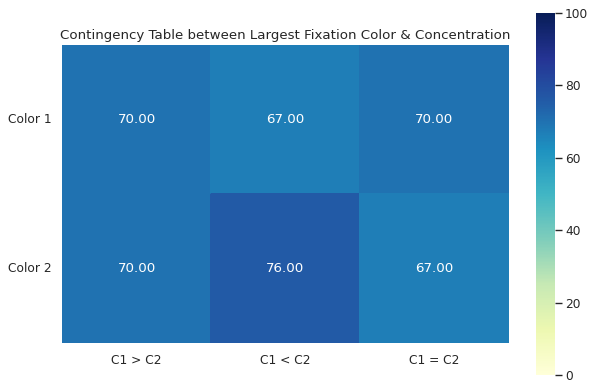


Chi-squared test yields test statistic 0.5465242469368141 with p-value 0.7608933134922299.


In [ ]:
chi2_test_hyp1(bc_largest_fp, "Contingency Table between Largest Fixation Color & Concentration")

Based on the p-value we may reject the hypothesis presented at significance level 0.05.
Therefore, we conclude that the largest fixation hue and the concentration of the color in the image are, indeed, independent.

##Dominance Hypothesis:
We test the hypothesis that the fixation hue is correlated to the dominant hue.
Formally, we have:
1.   *Null Hypothesis:* The fixation hue is independent of the dominant hue.
2.   *Alternative Hypothesis:* The fixation hue is dependent on the dominant hue.

###First Fixation Point Analysis:



In [ ]:
bc_first_fp

,CellRank,FixationType,ImageID,ParticipantID,X,Y,ID,R,G,B,Hue,Saturation,Value,DomHue,DomSat,DomVal
946,1,first,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
947,2,first,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
948,3,first,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
952,2,first,21,3,2,0,21,128,128,0,60.0,1.0,0.501961,65,0.882682,0.5549
954,1,first,21,3,2,3,21,0,128,0,120.0,1.0,0.501961,65,0.882682,0.5549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,1,first,38,6,1,3,38,179,0,0,0.0,1.0,0.701961,0,0.900000,1.0000
1779,3,first,38,6,1,1,38,179,179,0,60.0,1.0,0.701961,0,0.900000,1.0000
1780,1,first,38,9,2,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600
1783,2,first,38,9,1,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600


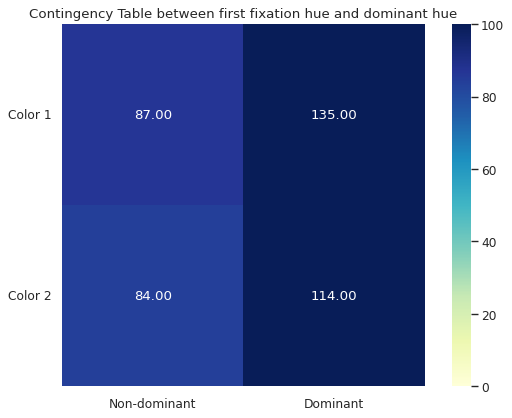


Chi-squared test yields test statistic 0.32964076083923843 with p-value 0.56587069770482.


In [ ]:
chi2_test_hyp2(bc_first_fp, "Contingency Table between first fixation hue and dominant hue")

##Largest Fixation Point Analysis:


In [ ]:
bc_largest_fp

,CellRank,FixationType,ImageID,ParticipantID,X,Y,ID,R,G,B,Hue,Saturation,Value,DomHue,DomSat,DomVal
949,1,largest,21,1,2,0,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
950,2,largest,21,1,2,2,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
951,3,largest,21,1,1,2,21,128,128,0,60.0,1.0,0.501961,110,0.816568,0.5915
953,3,largest,21,3,2,0,21,128,128,0,60.0,1.0,0.501961,65,0.882682,0.5549
955,2,largest,21,3,2,3,21,0,128,0,120.0,1.0,0.501961,65,0.882682,0.5549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,2,largest,38,6,1,0,38,179,0,0,0.0,1.0,0.701961,0,0.900000,1.0000
1778,3,largest,38,6,1,3,38,179,0,0,0.0,1.0,0.701961,0,0.900000,1.0000
1781,1,largest,38,9,2,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600
1782,2,largest,38,9,2,0,38,179,0,0,0.0,1.0,0.701961,360,1.000000,0.0600


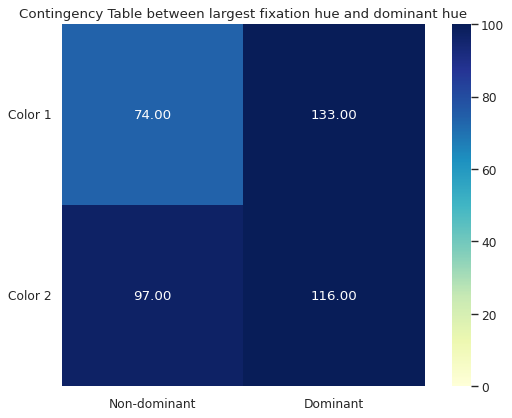


Chi-squared test yields test statistic 3.7735776386955027 with p-value 0.05206815220067556.


In [ ]:
chi2_test_hyp2(bc_largest_fp, "Contingency Table between largest fixation hue and dominant hue")

We find that the dominant hues are largest fixation points more often at significance about 0.05, and that the first fixation point hue is independent of dominant hues. 


#Distribution of the fixation point hues and dominant hues:

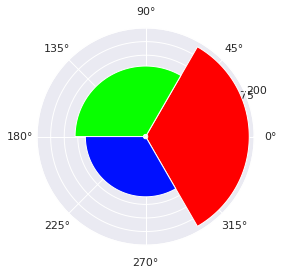

In [ ]:
polar_plot(bc_first_fp, "Hue")

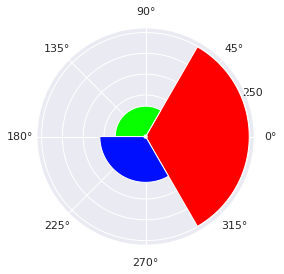

In [ ]:
polar_plot(bc_first_fp, "DomHue")

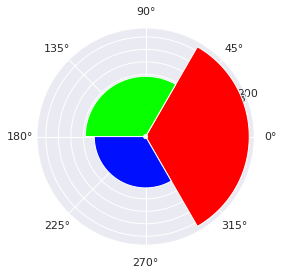

In [ ]:
polar_plot(bc_largest_fp, "Hue")

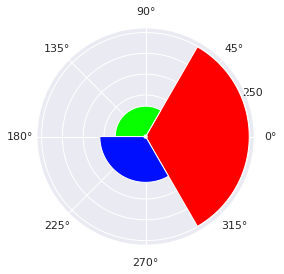

In [ ]:
polar_plot(bc_largest_fp, "DomHue")